# Linear regression


Let's download the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Let's generate artificial data.

In [ ]:
def generate_data(n_points=20):
  """
   Receives n_points points as input
     Returns training and test data
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, y, X_train, y_train, X_test, y_test

In [ ]:
X, y, X_train, y_train, X_test, y_test = generate_data(100)

Let's visualize the data using the matplotlib library.

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend(loc='best')
plt.show()

Let's work with the simplest one-dimensional case of regression. Let's train our model on the training set and predict the values on the test sample.
We will save the predicted answers into a variable $\textbf{predictions}$, and store the model weights in variables $\textbf{w}$, $b$.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train) # model training

w = model.coef_
b = model.intercept_

In [ ]:
w, b

Let's visualize the predictions.

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(w) + b, label='predicted')
plt.legend()
plt.show()

## Evaluation of results

Let's calculate the root mean square error on the train and on the test. We also calculate the mean absolute error.

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

In [ ]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

# Predicting response to a marketing campaign

Let's take a dataset containing information about clients and the marketing campaign of a certain bank. Our task is to predict the success of the campaign for each client. The features are different characteristics of the client and the campaign.

Which features would you use?

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
# read the data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('../data/bank.csv', sep=',')

In [ ]:
data.head()

In [ ]:
data.info()

Are the classes balanced? Pay attention to the features, build a correlation matrix, select the features

In [32]:
# your code
# Let's look at the main statistical indicators(summary statistics)
# using the method .describe()
data.describe().round(2)
print(data.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [2]:
data['y'] = (data['y'].astype(str).str.lower() == 'yes').astype(int)
y = data['y']
X = data.drop(columns=['y'])

查看正负类别是否平衡

In [7]:
print(data['y'].value_counts())

y
0    4000
1     521
Name: count, dtype: int64


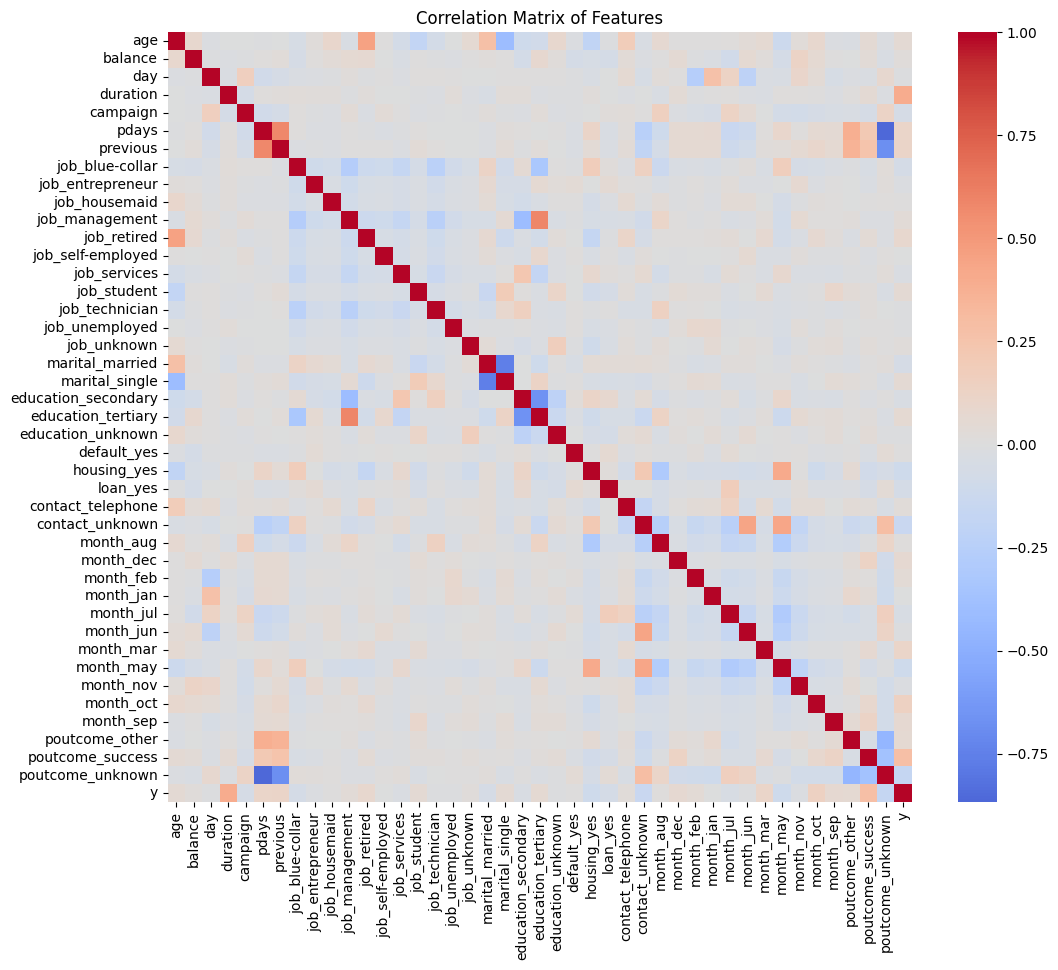

duration              0.401118
poutcome_success      0.283481
month_oct             0.145964
previous              0.116714
pdays                 0.104087
month_mar             0.102716
job_retired           0.086675
month_sep             0.071510
month_dec             0.069884
education_tertiary    0.056649
poutcome_other        0.051908
job_student           0.047809
marital_single        0.045815
age                   0.045092
month_feb             0.039805
dtype: float64


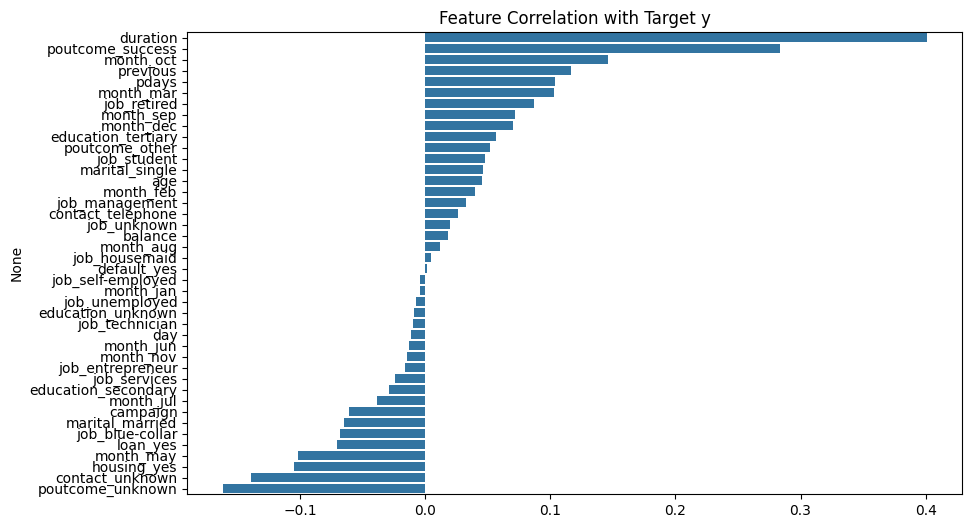

In [12]:
# 区分类别型和数值型特征
cat_cols = [c for c in data.columns if data[c].dtype == 'object']
num_cols = [c for c in data.columns if c not in cat_cols + ['y']]

from sklearn.preprocessing import StandardScaler
# 对类别特征独热编码，对数值特征标准化
X_cat = pd.get_dummies(X[cat_cols], drop_first=True)
scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(X[num_cols]), columns=num_cols)
X_processed = pd.concat([X_num, X_cat], axis=1)

# 可视化特征相关性（针对编码后数据）
X_visualized = X_processed.copy()
X_visualized = pd.concat([X_visualized, y], axis=1)
corr_matrix = X_visualized.corr()

# 可视化相关矩阵
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

# 与目标变量y的相关性的前15特征
corr = X_processed.corrwith(y).sort_values(ascending=False)
print(corr.head(15))

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=corr.values, y=corr.index)
plt.title('Feature Correlation with Target y')
plt.show()


In [35]:
feature_candidates = [f for f in corr.index if f != 'y']
features = feature_candidates[:15]
print(features)

['duration', 'poutcome_success', 'month_oct', 'previous', 'pdays', 'month_mar', 'job_retired', 'month_sep', 'month_dec', 'education_tertiary', 'poutcome_other', 'job_student', 'marital_single', 'age', 'month_feb']


Let's split the sample into train and test

In [36]:
X_processed = X_processed[features]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)

Let's train linear regression

In [37]:
# your code
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Finally, let's calculate the metrics

In [38]:
# your code
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# 标注行列（列=预测，行=真实）
cm_df = pd.DataFrame(
    cm,
    columns=['预测: 1(yes)', '预测: 0(no)'],
    index=['真实: 1(yes)', '真实: 0(no)']
)
print("\n误差矩阵（Confusion Matrix）：")
print(cm_df)

acc = accuracy_score(y_test, y_pred)
print(f"\n准确率 Accuracy = {acc:.4f}")


误差矩阵（Confusion Matrix）：
            预测: 1(yes)  预测: 0(no)
真实: 1(yes)          40        116
真实: 0(no)           27       1174

准确率 Accuracy = 0.8946
